In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=200, n_features=3, n_informative=2, n_targets=1, noise=30)
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'feature3': X[:, 2], 'target': y})

In [3]:
df.head()

,feature1,feature2,feature3,target
0,0.374916,3.102503,1.392649,63.629648
1,0.649832,0.358168,-0.664650,-6.775483
2,0.337048,-0.723638,0.616038,-8.824232
3,-1.263108,-1.469690,0.077493,-66.938730
4,0.355656,-0.535148,-1.860213,-15.689453


In [5]:
x =  df.iloc[:,0:3].values
y= df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [10]:
#Residual 

y_pred = model.predict(X_test)
residual = Y_test - y_pred

1. Linear Relationship

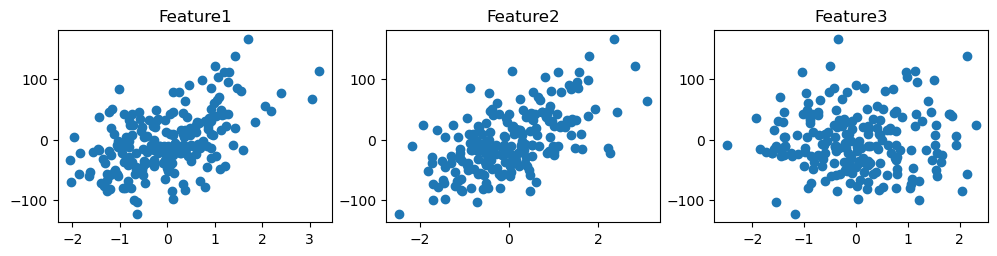

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,2.5))
ax1.scatter(df['feature1'],df['target'])
ax1.set_title('Feature1')
ax2.scatter(df['feature2'],df['target'])
ax2.set_title('Feature2')
ax3.scatter(df['feature3'],df['target'])
ax3.set_title('Feature3')
plt.show()

2. Multicollinerity

A variance inflation factor (VIF) measures th amount of multicollimerity in a set o

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    print(i)
    vif.append(variance_inflation_factor(x_train,i))

0
1
2


In [19]:
pd.DataFrame({'vif':vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010689,1.011048,1.01474


<Axes: >

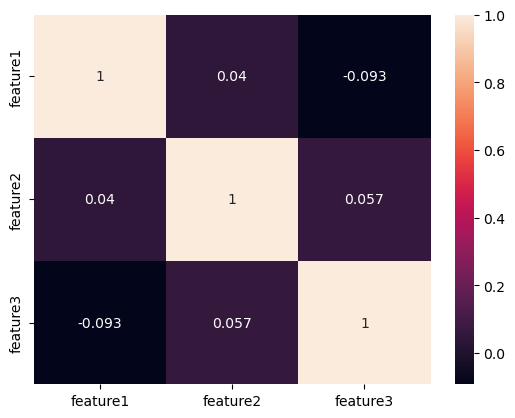

In [20]:
#Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)